<a href="https://colab.research.google.com/github/osawa-fernando/ML/blob/main/Reconhecimento_Facial_(Com_treino_de_detec%C3%A7%C3%A3o_e_classifica%C3%A7%C3%A3o_de_rostos_2_classes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Treino de Detecção e Classificação de 2 classes**

In [1]:
!pip install mediapipe scikit-learn opencv-python


In [2]:
import cv2
import mediapipe as mp
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab import files
import matplotlib.pyplot as plt

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

In [7]:
def detectar_rosto(image):
    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.6) as face_detection:
        results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.detections:
            for det in results.detections:
                bbox = det.location_data.relative_bounding_box
                h, w, _ = image.shape
                x, y = int(bbox.xmin * w), int(bbox.ymin * h)
                w_box, h_box = int(bbox.width * w), int(bbox.height * h)
                face = image[y:y + h_box, x:x + w_box]
                # Add a check to ensure the extracted face is not empty
                if face.shape[0] > 0 and face.shape[1] > 0:
                    return cv2.resize(face, (100, 100))
    return None

In [26]:
print("📤 Envie imagens rotuladas. Ex: joao1.jpg, maria2.jpg")
uploaded = files.upload()

X, y = [], []

for filename in uploaded:
    img = cv2.imread(filename)
    face = detectar_rosto(img)
    if face is not None: # Added this check
        X.append(face.flatten())
        label = filename.split('.')[0].rstrip('0123456789')
        y.append(label)
    else:
        print(f"⚠️ Nenhum rosto encontrado em {filename}")


X = np.array(X)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Treinar classificador
clf = SVC(kernel='linear', probability=True)
clf.fit(X, y_encoded)

print("✅ Treinamento concluído.")

📤 Envie imagens rotuladas. Ex: joao1.jpg, maria2.jpg


Saving Theo1.jpg to Theo1 (1).jpg


ValueError: The number of classes has to be greater than one; got 1 class

📤 Envie uma imagem para teste:


Saving Teste.jpg to Teste.jpg


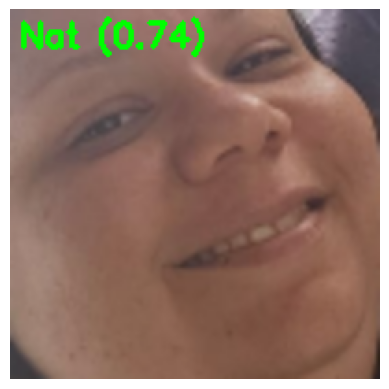

In [20]:
print("📤 Envie uma imagem para teste:")
uploaded_test = files.upload()
file_test = list(uploaded_test.keys())[0]

img = cv2.imread(file_test)
face = detectar_rosto(img)

if face is not None:
    X_test = face.flatten().reshape(1, -1)
    pred = clf.predict(X_test)[0]
    prob = clf.predict_proba(X_test).max()
    label = le.inverse_transform([pred])[0]

    # Mostrar imagem com resultado
    img_resized = cv2.resize(face, (200, 200))
    cv2.putText(img_resized, f"{label} ({prob:.2f})", (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("❌ Nenhum rosto detectado.")

**Sistema de Reconhecimento Facial**

In [15]:
from google.colab.patches import cv2_imshow

Saving Nat11.jpg to Nat11.jpg


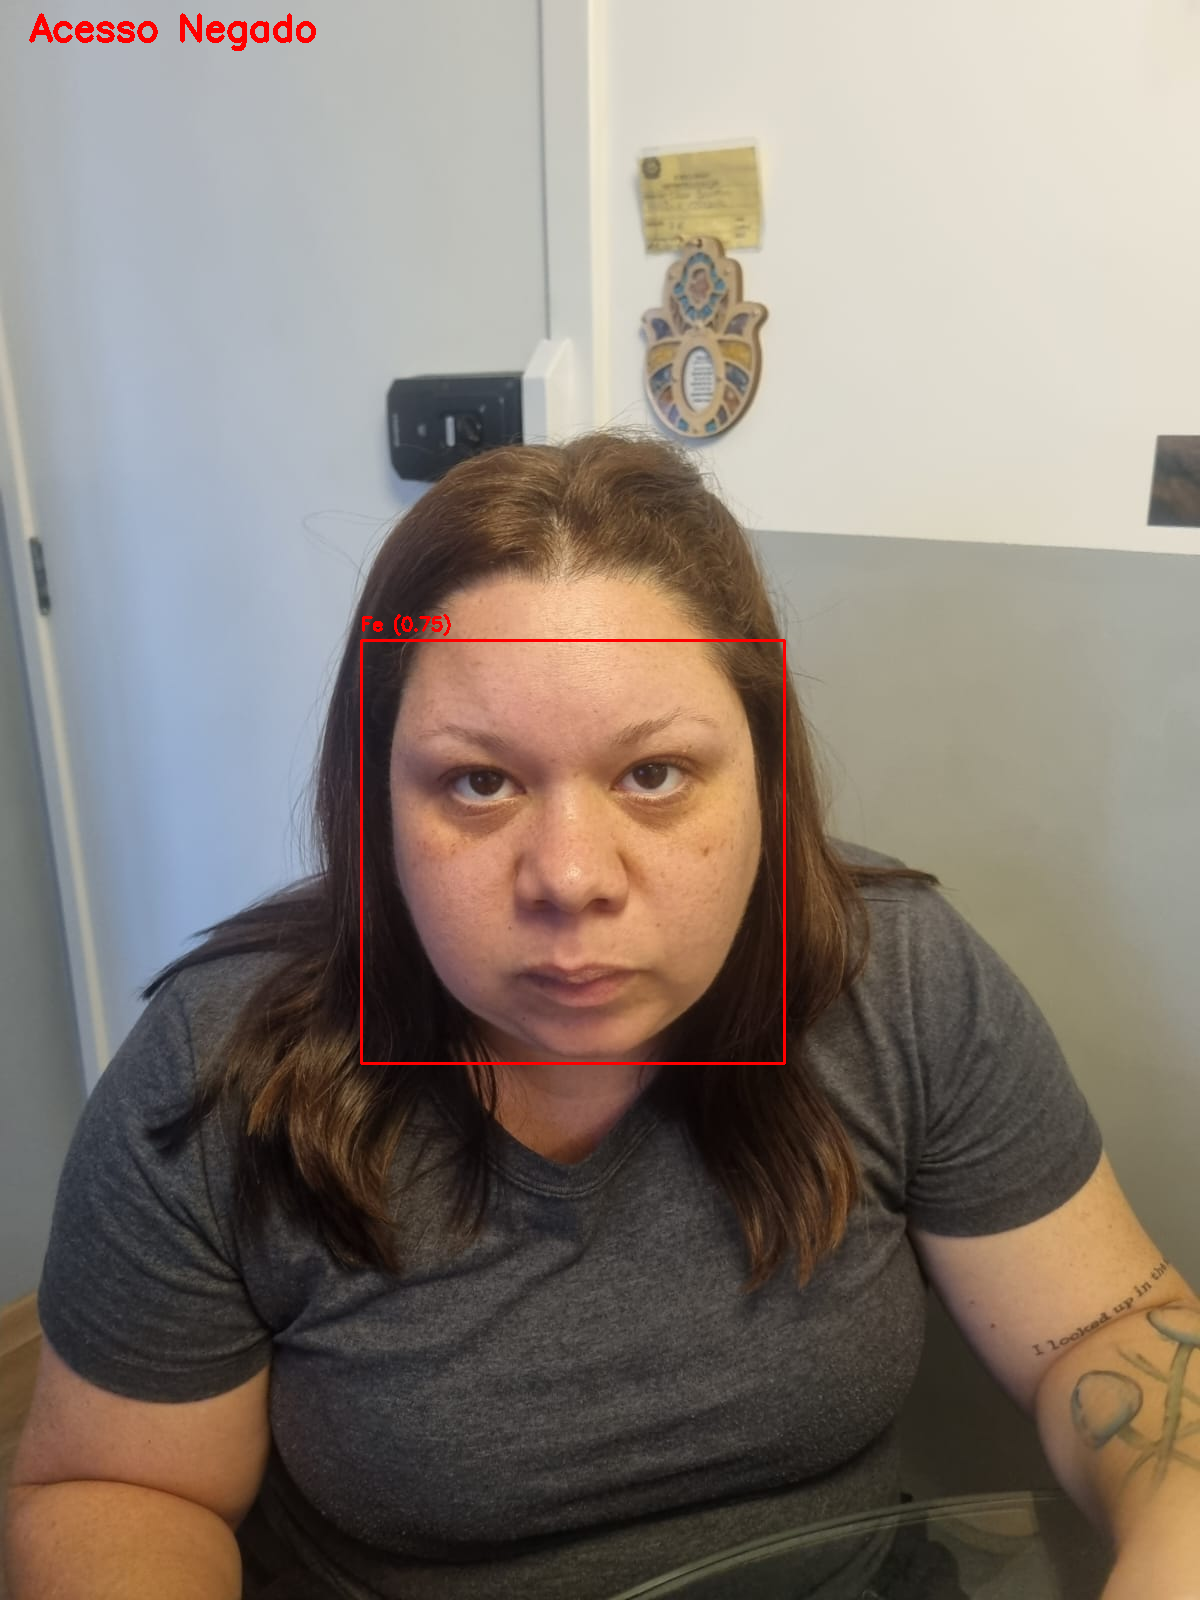

In [25]:
# Solicita ao usuário o caminho da imagem
uploaded_test = files.upload()
file_test = list(uploaded_test.keys())[0]

# Carregar imagem
frame = cv2.imread(file_test)
if frame is None:
    print(f"❌ Erro ao carregar a imagem: {file_test}")
    exit()

# Inicializar o detector do MediaPipe
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.6) as detector:
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = detector.process(image_rgb)

    message = "Aguardando rosto..."
    color = (255, 255, 0)  # Amarelo

    if results.detections:
        for det in results.detections:
            bbox = det.location_data.relative_bounding_box
            h, w, _ = frame.shape
            x, y = int(bbox.xmin * w), int(bbox.ymin * h)
            w_box, h_box = int(bbox.width * w), int(bbox.height * h)
            face = frame[y:y + h_box, x:x + w_box]

            if face.size > 0:
                face_resized = cv2.resize(face, (100, 100)).flatten().reshape(1, -1)
                pred = clf.predict(face_resized)[0]
                prob = clf.predict_proba(face_resized).max()
                label = le.inverse_transform([pred])[0]

                if label == "Nat":
                    message = "Acesso Garantido"
                    color = (0, 255, 0)  # Verde
                else:
                    message = "Acesso Negado"
                    color = (0, 0, 255)  # Vermelho

                # Desenhar bounding box e texto
                cv2.rectangle(frame, (x, y), (x + w_box, y + h_box), color, 2)
                cv2.putText(frame, f"{label} ({prob:.2f})", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    else:
        message = "Nenhum rosto detectado"

    # Mostrar mensagem geral no topo da imagem
    cv2.putText(frame, message, (30, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color, 3)

    # Mostrar a imagem final
    cv2_imshow(frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()